In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

import os
import json

HOME="/linkhome/rech/genini01/ucv88ce/"

In [2]:
#better and bigger plots inline
plt.rcParams['figure.figsize'] = [12, 8]
plt.rcParams['figure.dpi'] = 100 # 200 e.g. is really fine, but slower


In [3]:
def get_log(model_name,outer_checkpoints_dir=os.path.join(HOME,"projects/MultilingualCPC/experiments/checkpoints/inftrain"), log_file="checkpoint_logs.json"):
    checkpoint_dir=os.path.join(outer_checkpoints_dir,model_name)
    checkpoint_log=os.path.join(checkpoint_dir,"checkpoint_logs.json")
    with open(checkpoint_log, 'r') as infile:
        log=json.load(infile)
    return log

In [4]:
#Plot locLoss_train
def plot_measure(log,measure_type):
    x=log['epoch']
    y=[np.array(x).mean() for x in log[measure_type]] #we are using the average for all times steps from n+1 to n+12
    y=[np.nan if i ==0.0 else i for i in y]
    #y=[np.nan if i ==0.0 else i for i in y[1:]]
    #y.insert(0,0)




    plt.plot(x, y, 'b.--', linewidth=2, markersize=12)
    plt.xlabel('# epochs')
    plt.ylabel(measure_type)

In [5]:
def compare_plot_measures(log_list, modelname_list, measure_type='locAcc_val'):
    #for y,z in zip(log_list, modelname_list):
    for log in log_list:
        x=log['epoch']
        y=[np.array(x).mean() for x in log[measure_type]] #we are using the average for all times steps from n+1 to n+12
        y=[np.nan if i ==0.0 else i for i in y]
        #y=[np.nan if i ==0.0 else i for i in y[1:]]
        #y.insert(0,0)
        plt.plot(x, y)
        
    plt.xlabel('# epochs')
    plt.ylabel(measure_type)
    plt.legend(modelname_list)
    return plt

In [27]:
def compare_plot_measures_mult(log_list, modelname_list, measure_type=['locLoss_train', 'locAcc_train', 'locLoss_val', 'locAcc_val']):
    
    fig, axs = plt.subplots(2,2)
    
    for subplt, measure in zip([axs[0, 0], axs[0, 1], axs[1,0], axs[1,1]], measure_type):
        for log in log_list:
            x=log['epoch']
            y=[np.array(x).mean() for x in log[measure]] #we are using the average for all times steps from n+1 to n+12
            y=[np.nan if i ==0.0 else i for i in y]
            #y=[np.nan if i ==0.0 else i for i in y[1:]]
            #y.insert(0,0)

            subplt.plot(x, y)

            subplt.set(xlabel='# epochs', ylabel=measure)
    plt.legend(modelname_list)
    

<module 'matplotlib.pyplot' from '/gpfswork/rech/ank/ucv88ce/miniconda3/envs/cpc2/lib/python3.7/site-packages/matplotlib/pyplot.py'>

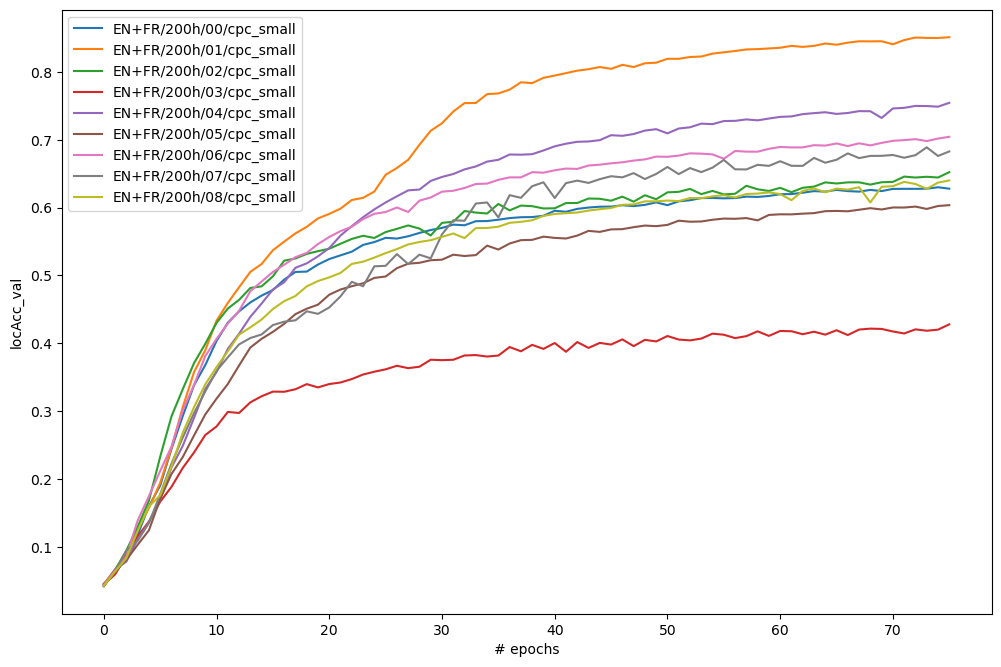

In [13]:
log_names = ["EN+FR/200h/{}/cpc_small".format(str(x).zfill(2)) for x in range(9)]
log_list=[get_log(x) for x in log_names]
compare_plot_measures(log_list, log_names) 


for model in [os.path.join(HOME,"projects/MultilingualCPC/experiments/checkpoints/inftrain", "EN+FR/400h/{}/cpc_small".format(str(x).zfill(2))) for x in range(16)]:
    dic = {'epoch':[], 'iter':[], 'saveStep':5,'logging_step': 1000,  'locLoss_train': [], 'locAcc_train':[], 'locLoss_val':[],'locAcc_val':[] }
    for ep in range(100, 0, -5):
        if os.path.isfile(os.path.join(model, "checkpoint_{}.pt".format(ep))):
            last_ep = ep
            break
    dic['epoch'] = list(range(last_ep+1))
    dic['iter'] = [0]*(last_ep+1)
    dic['locLoss_train'] = np.zeros((last_ep+1, 12)).tolist()
    dic['locAcc_train'] = np.zeros((last_ep+1, 12)).tolist()
    dic['locLoss_val'] = np.zeros((last_ep+1, 12)).tolist()
    dic['locAcc_val'] =np.zeros((last_ep+1, 12)).tolist()
    
    if not os.path.isfile(os.path.join(model, "checkpoint_logs.json")):
        with open(os.path.join(model, "checkpoint_logs.json"), 'w') as outfile:
            json.dump(dic, outfile, indent=4)
    

<module 'matplotlib.pyplot' from '/gpfswork/rech/ank/ucv88ce/miniconda3/envs/cpc2/lib/python3.7/site-packages/matplotlib/pyplot.py'>

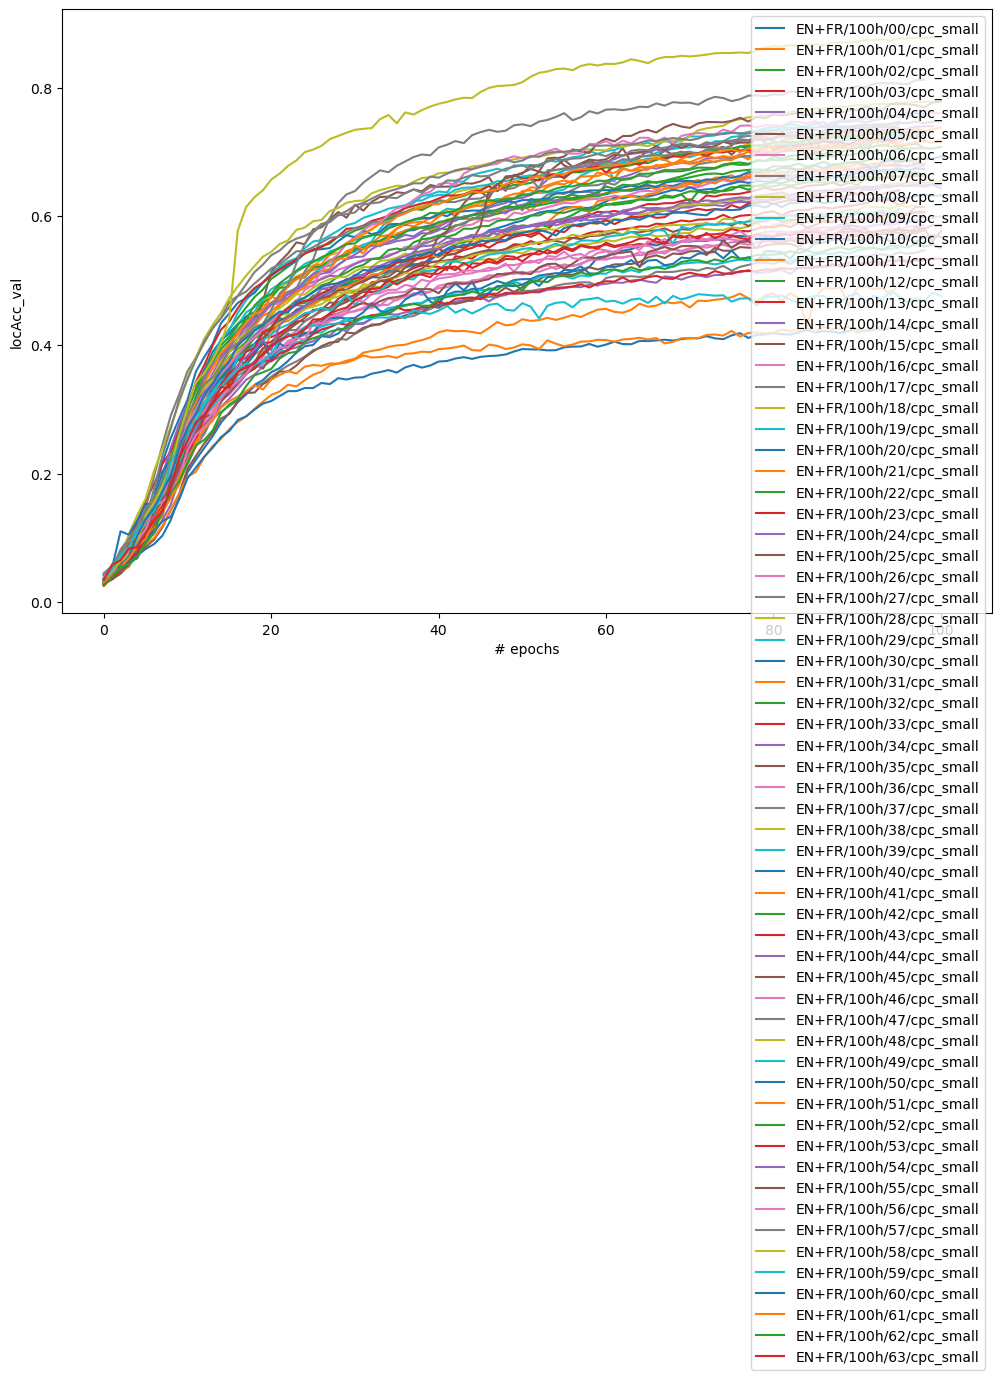

In [14]:
log_names = ["EN+FR/100h/{}/cpc_small".format(str(x).zfill(2)) for x in range(0, 64)]
log_list=[get_log(x) for x in log_names]
compare_plot_measures(log_list, log_names) 

<module 'matplotlib.pyplot' from '/gpfswork/rech/ank/ucv88ce/miniconda3/envs/cpc2/lib/python3.7/site-packages/matplotlib/pyplot.py'>

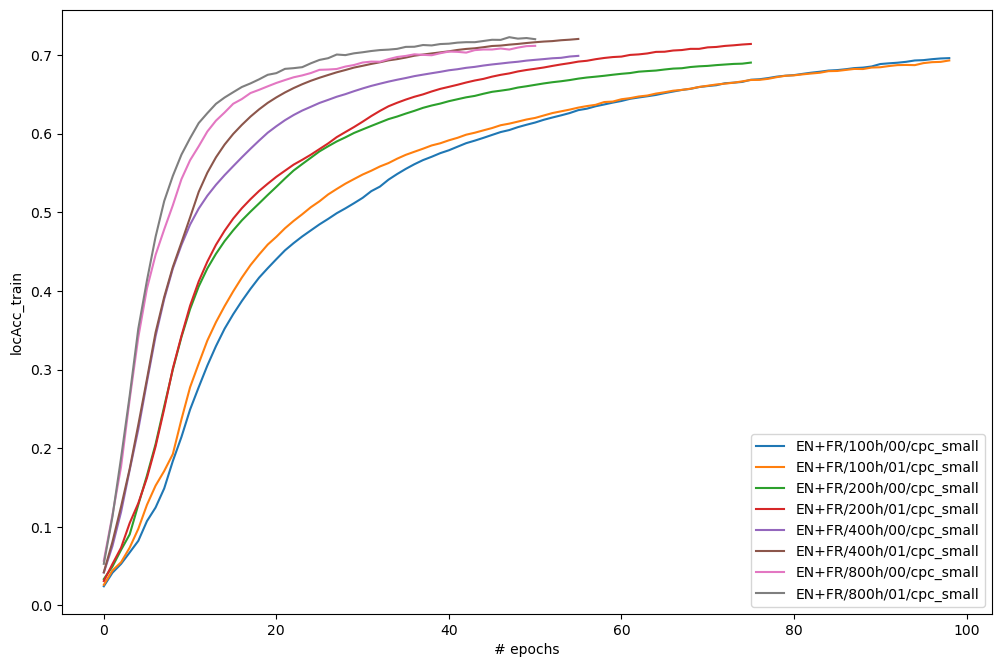

In [15]:
log_names = ["EN+FR/100h/{}/cpc_small".format(str(x).zfill(2)) for x in range(0, 2)]+ ["EN+FR/200h/{}/cpc_small".format(str(x).zfill(2)) for x in range(0, 2)]+["EN+FR/400h/{}/cpc_small".format(str(x).zfill(2)) for x in range(0, 2)]+["EN+FR/800h/{}/cpc_small".format(str(x).zfill(2)) for x in range(0, 2)]
log_list=[get_log(x) for x in log_names]
compare_plot_measures(log_list, log_names, measure_type='locAcc_train') 

<module 'matplotlib.pyplot' from '/gpfswork/rech/ank/ucv88ce/miniconda3/envs/cpc2/lib/python3.7/site-packages/matplotlib/pyplot.py'>

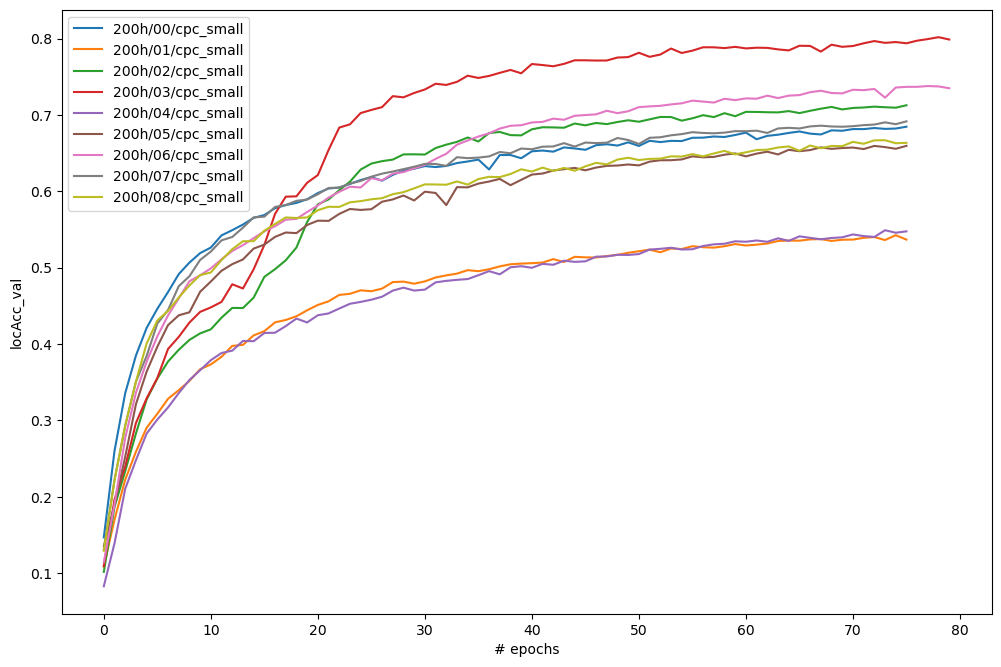

In [16]:
log_names = ["200h/{}/cpc_small".format(str(x).zfill(2)) for x in range(9)]
log_list=[get_log(x,outer_checkpoints_dir="/linkhome/rech/genini01/ucv88ce/projects/InfTrain/InfTrain_models/EN/") for x in log_names]
compare_plot_measures(log_list, log_names)

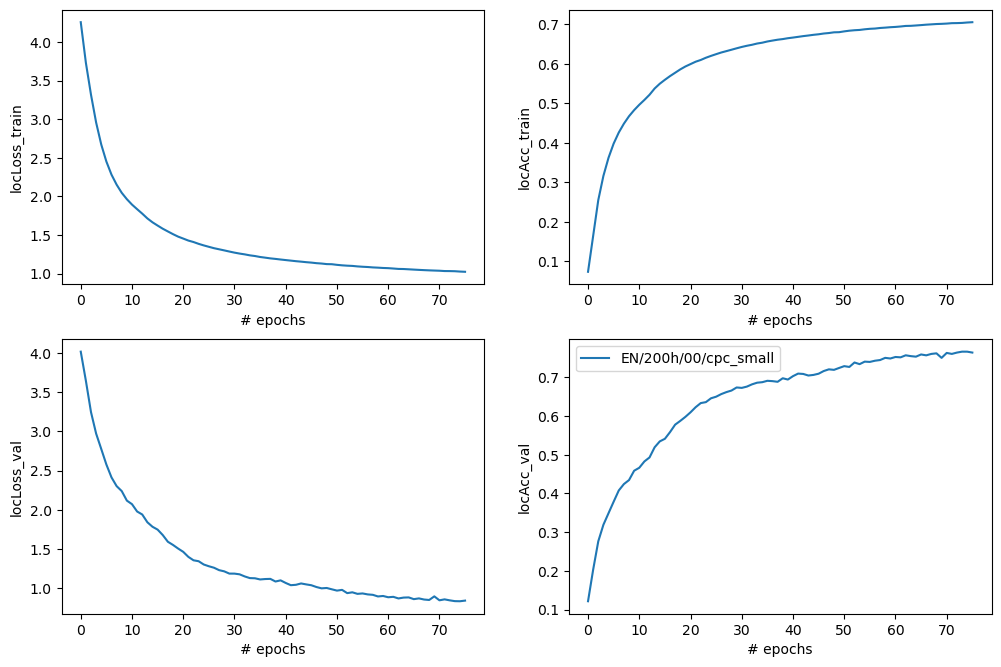

In [22]:
log_names = ["EN/200h/{}/cpc_small".format(str(x).zfill(2)) for x in range(12)]
log_list=[get_log(x,outer_checkpoints_dir="/linkhome/rech/genini01/ucv88ce/projects/InfTrain/InfTrain_models") for x in log_names]
compare_plot_measures_mult(log_list, log_names) 

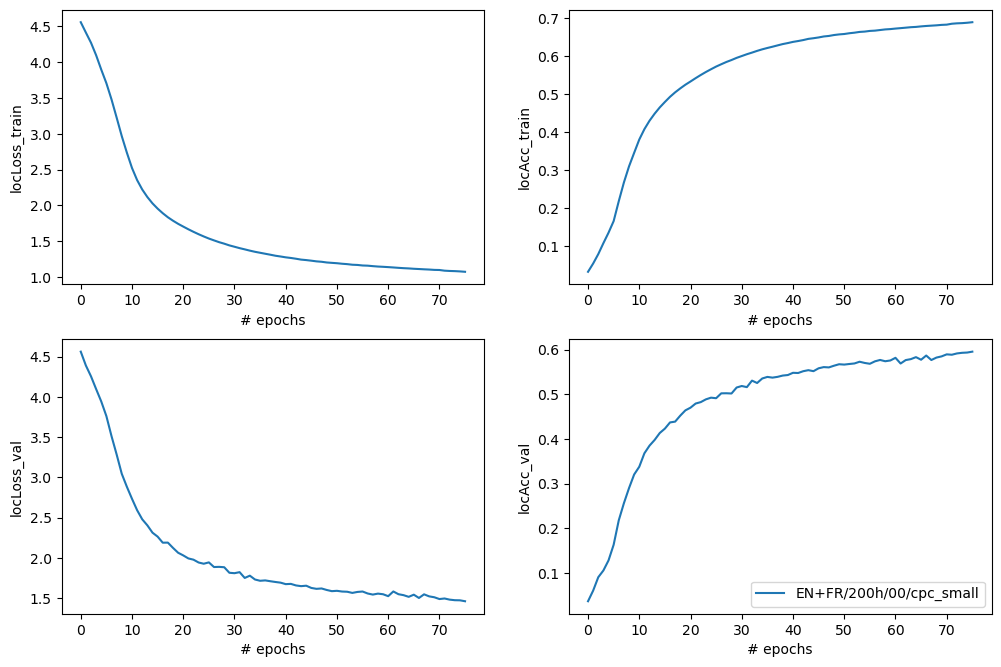

In [23]:
log_names = ["EN+FR/200h/{}/cpc_small".format(str(x).zfill(2)) for x in range(32)]
log_list=[get_log(x) for x in log_names]
compare_plot_measures_mult(log_list, log_names) 

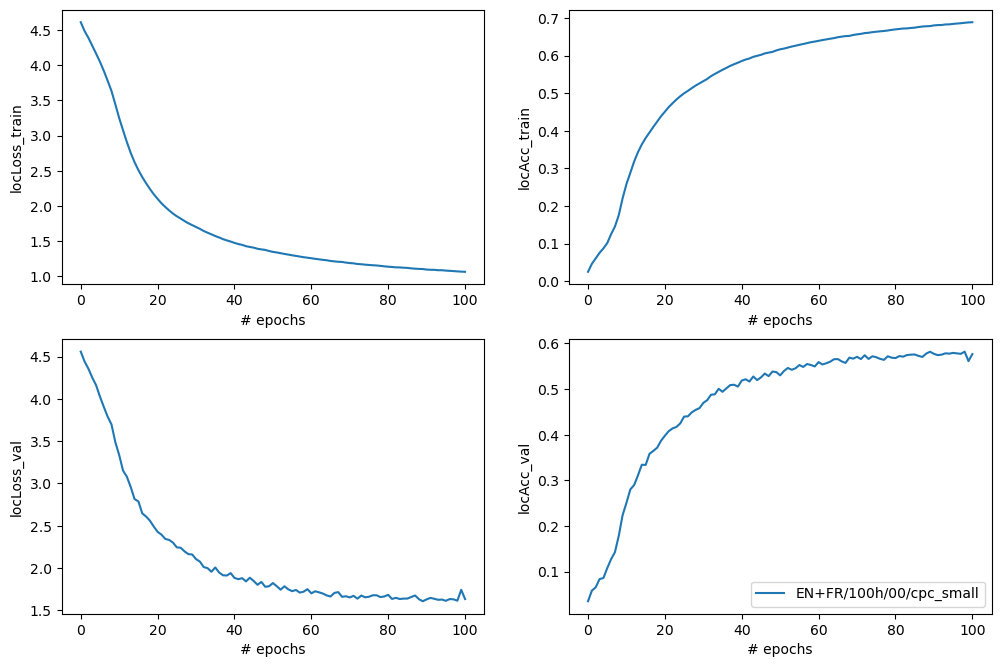

In [24]:
log_names = ["EN+FR/100h/{}/cpc_small".format(str(x).zfill(2)) for x in range(0, 64)] #fix the 01 priblem
log_list=[get_log(x) for x in log_names]
compare_plot_measures_mult(log_list, log_names) 

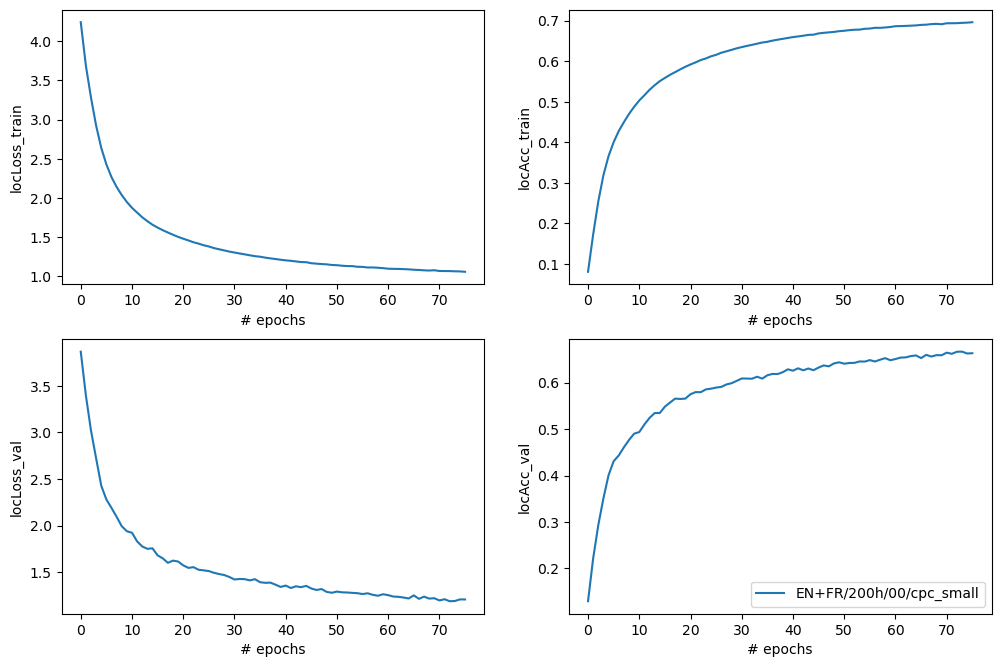

In [25]:
log_names_bil = ["EN+FR/200h/{}/cpc_small".format(str(x).zfill(2)) for x in range(9)]
log_names_mono = ["200h/{}/cpc_small".format(str(x).zfill(2)) for x in range(9)]

log_list=[get_log(x) for x in log_names_bil] + [get_log(x,outer_checkpoints_dir="/linkhome/rech/genini01/ucv88ce/projects/InfTrain/InfTrain_models/EN/") for x in log_names_mono]


compare_plot_measures_mult(log_list, log_names_bil+log_names_mono) 

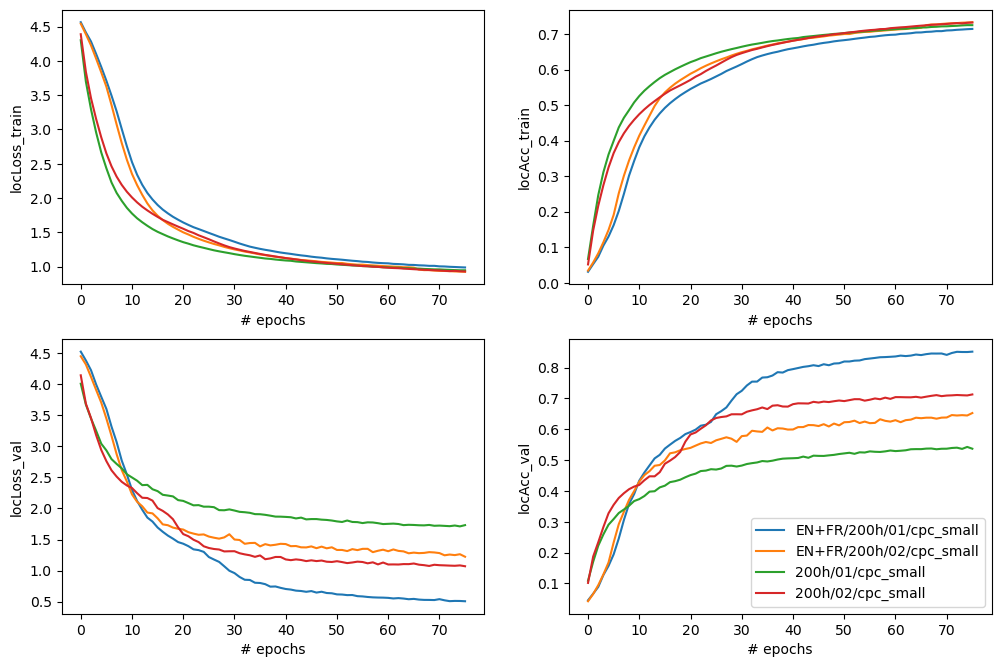

In [28]:
log_names_bil = ["EN+FR/200h/{}/cpc_small".format(str(x).zfill(2)) for x in range(1,3)]
log_names_mono = ["200h/{}/cpc_small".format(str(x).zfill(2)) for x in range(1,3)]

log_list=[get_log(x) for x in log_names_bil] + [get_log(x,outer_checkpoints_dir="/linkhome/rech/genini01/ucv88ce/projects/InfTrain/InfTrain_models/EN/") for x in log_names_mono]


compare_plot_measures_mult(log_list, log_names_bil+log_names_mono) 

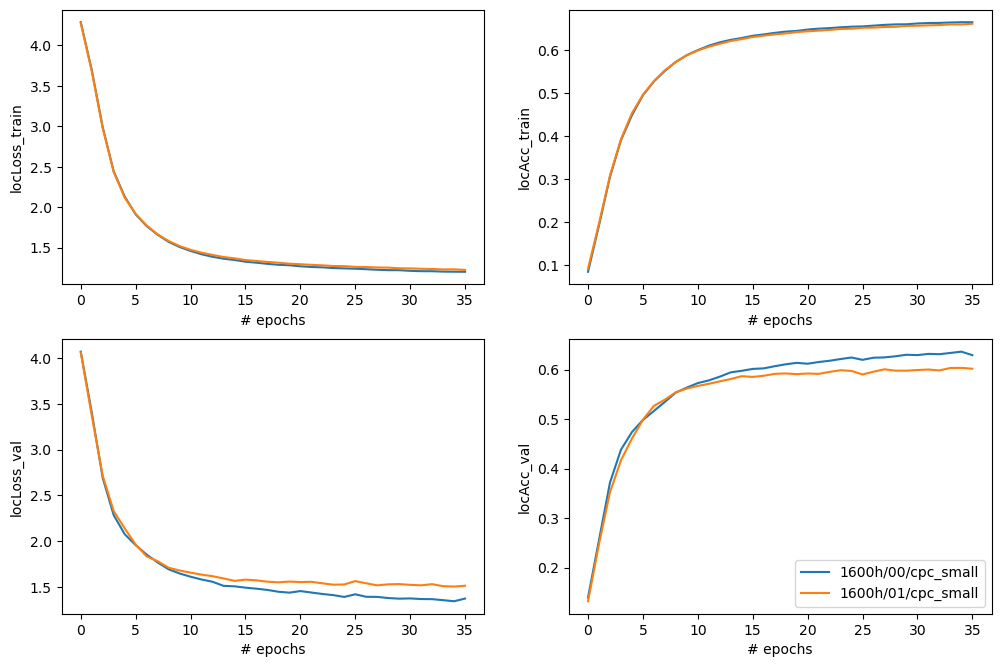

In [40]:
log_names_mono = ["1600h/{}/cpc_small".format(str(x).zfill(2)) for x in range(0,2)]

log_list=[get_log(x,outer_checkpoints_dir="/linkhome/rech/genini01/ucv88ce/projects/InfTrain/InfTrain_models/EN/") for x in log_names_mono]


compare_plot_measures_mult(log_list, log_names_mono) 

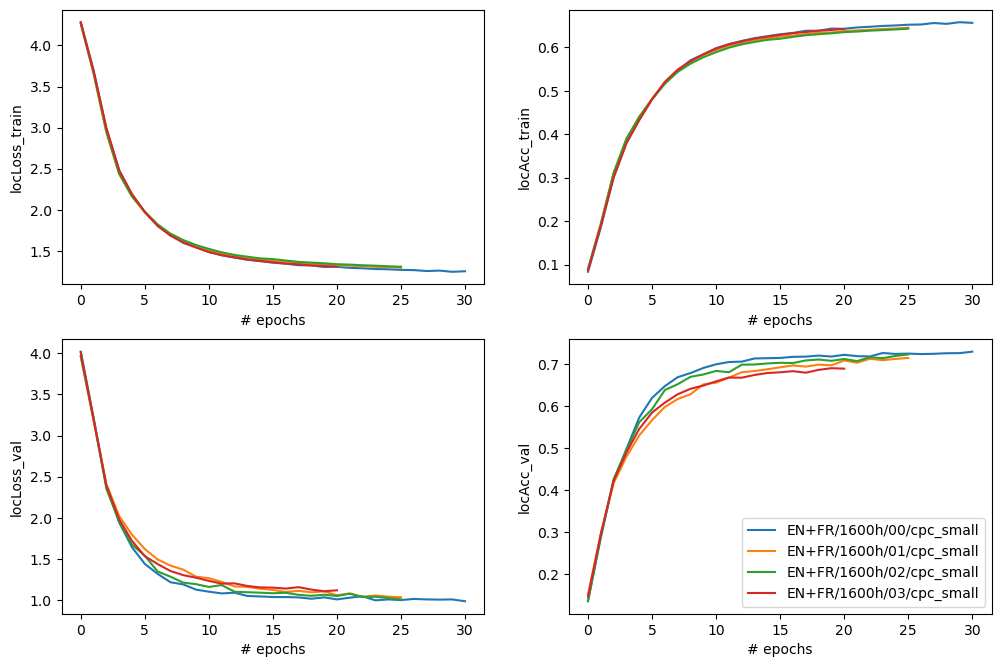

In [37]:
log_names_bil = ["EN+FR/1600h/{}/cpc_small".format(str(x).zfill(2)) for x in range(0,4)]

log_list=[get_log(x) for x in log_names_bil] 


compare_plot_measures_mult(log_list, log_names_bil) 

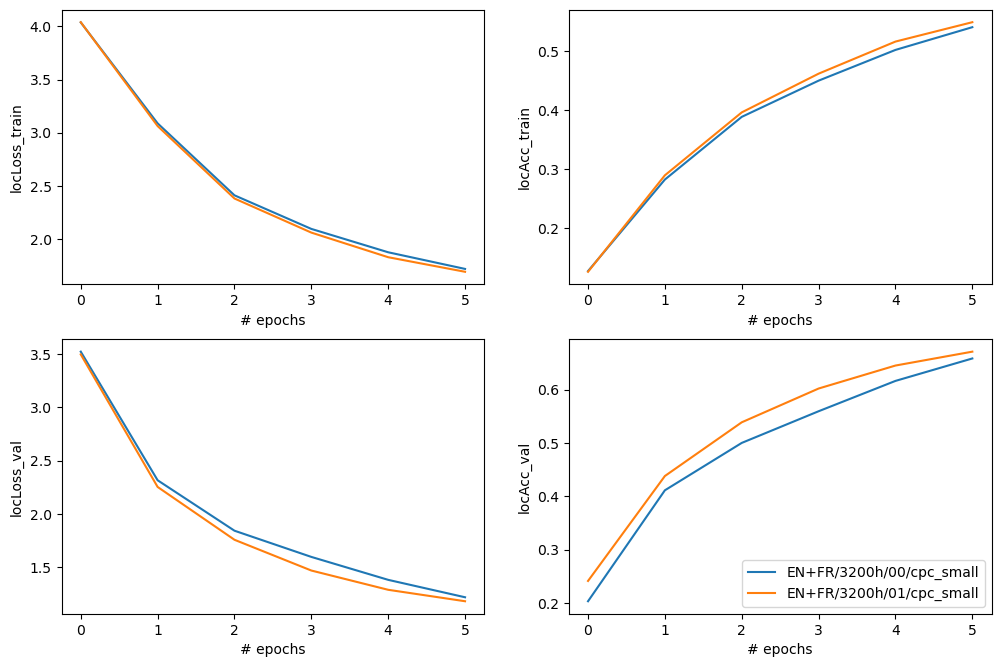

In [38]:
log_names_bil = ["EN+FR/3200h/{}/cpc_small".format(str(x).zfill(2)) for x in range(0,2)]

log_list=[get_log(x) for x in log_names_bil] 


compare_plot_measures_mult(log_list, log_names_bil) 

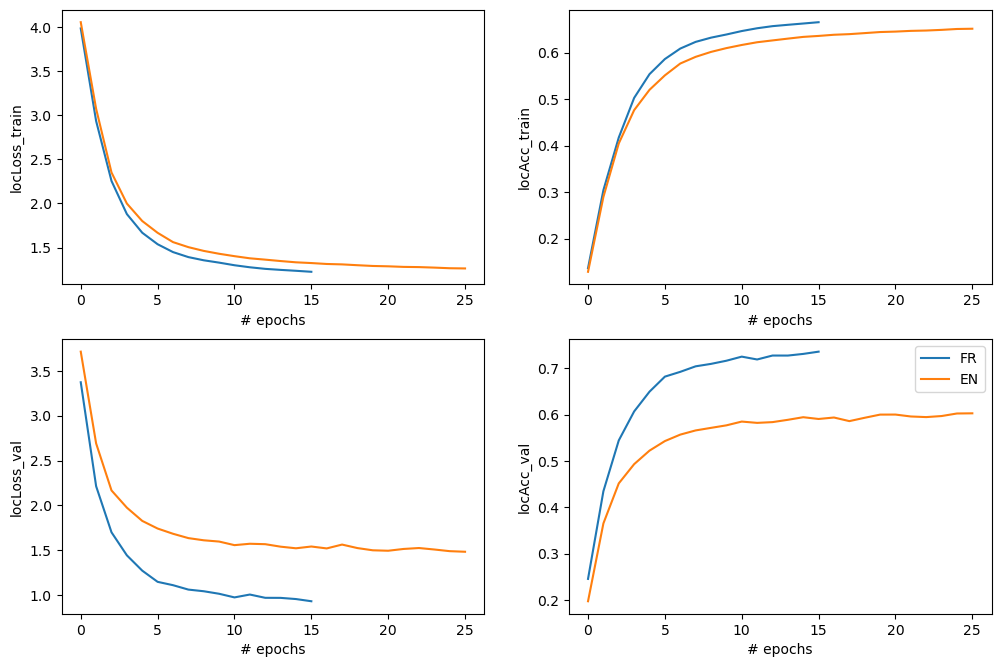

In [48]:
log_names_mono = ["3200h/{}/cpc_small".format(str(x).zfill(2)) for x in range(0,1)]

log_list=[get_log(x,outer_checkpoints_dir="/linkhome/rech/genini01/ucv88ce/projects/InfTrain/InfTrain_models/FR/") for x in log_names_mono]+[get_log(x,outer_checkpoints_dir="/linkhome/rech/genini01/ucv88ce/projects/InfTrain/InfTrain_models/EN/") for x in log_names_mono]


compare_plot_measures_mult(log_list, ["FR","EN"]) 